In [257]:
import numpy as np
import pandas as pd
import seaborn as snsg_hexp
from css_utility import *
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook

In [390]:
whole_gene_filei

'../database/RefSeq/RefSeq.WholeGene.bed'

### Whole gene extraction

1. Whole gene extraction for a cell (e.g. E112: HUVEC) from ROADMAP data
    * Path: `"../database/bed/unzipped/E112_15_coreMarks_stateno.bed"`
    * Function: `compGene2css(whole_gene_file, df)` where `df` comes from the function `bed2df_expanded`
2. Reduce to the unit length 
    * Input: previous output
    * Function: `Convert2unitCSS_main`

In [418]:
whole_gene_file  # stored at css_utility.py

'../database/RefSeq/RefSeq.WholeGene.bed'

In [417]:
df_e112=bed2df_expanded("../database/bed/unzipped/E112_15_coreMarks_stateno.bed")

In [419]:
css_E112_gene_lst_all=compGene2css(whole_gene_file,df_e112)

Extracting the gene file ...
Done!


In [420]:
css_E112_gene_unit_lst_all=Convert2unitCSS_main(css_E112_gene_lst_all,unit=200)

Converting css from the raw length into unit-length ... 



Done!


Total count= 41923


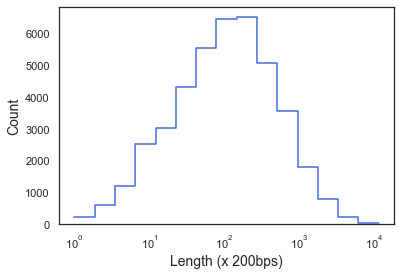

In [422]:
# Visualization: length distibution
css_E112_gene_unit_all=flatLst(css_E112_gene_unit_lst_all)
css_E112_gene_unit_all_len=[len(elm) for elm in css_E112_gene_unit_all]
sns.histplot(css_E112_gene_unit_all_len, log_scale=True, element="step", fill=False, color="royalblue", bins=15)
print("Total count= {}".format(len(css_E112_gene_unit_all_len)))
plt.xlabel("Length (x 200bps)", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

In [442]:
epi_name_path="../database/bed/gene_expression/EG.name.txt"
epi_name_df=pd.read_csv(epi_name_path,sep="\t",header=None,index_col=False)
epi_num=epi_name_df[0].dropna().to_list()

In [448]:
bed_file_path="../database/bed/unzipped/"
bed_file_lst=sorted(os.listdir(bed_file_path))
len(epi_name)

58

In [449]:
len(bed_file_lst)

127

In [450]:
epi_target_tuple=[(num, bed_file) for num in epi_num for bed_file in bed_file_lst if num in bed_file]
epi_target=[tup[1] for tup in epi_target_tuple]
len(epi_target)

56

In [475]:
bed_file_path="../database/bed/unzipped/"
epi_name_path="../database/bed/gene_expression/EG.name.txt"

epi_name_df=pd.read_csv(epi_name_path, names=["epi_num","epi_name"], sep="\t", header=None, index_col=False)
epi_num=epi_name_df["epi_num"].dropna().to_list() # number, 0th field
epi_name=epi_name_df["epi_name"].dropna().to_list() # name, 1st field
bed_file_lst=sorted(os.listdir(bed_file_path))

In [476]:
epi_target_tuple=[(num, bed_file) for num in epi_num for bed_file in bed_file_lst if num in bed_file]
epi_target=[tup[1] for tup in epi_target_tuple]

In [481]:
epi_name_df["epi_name"][epi_name_df["epi_num"]=="E003"][1]

'H1_Cell_Line'

In [544]:
# Save the whole gene area of the 57 epigenomes, in CSS unit sequences
# Following function has been already executed, and pickled at "../database/temp_files/whole_gene_unit/"

def extGenic_byCell(output_path="../database/temp_files/whole_gene_unit/", verbose=True):
    """
    Extract the genic area CSS from the designated 57 epigenome in EG.name.txt
    and save them at "../database/temp_files/whole_gene_unit/"
    """
    # note that EG.name.txt contains E000 (which is not in CSS bed file)
    bed_file_path="../database/bed/unzipped/"
    epi_name_path="../database/bed/gene_expression/EG.name.txt"

    epi_name_df=pd.read_csv(epi_name_path, names=["epi_num","epi_name"], sep="\t", header=None, index_col=False)
    epi_name_df=epi_name_df.dropna()
    epi_num=epi_name_df["epi_num"].dropna().to_list() # number, 0th field
    epi_name=epi_name_df["epi_name"].dropna().to_list() # name, 1st field
    bed_file_lst=sorted(os.listdir(bed_file_path))
    
    # list comprehension for extract the bed files that corresponds to the target epigenome
    epi_target_tuple=[(num, bed_file) for num in epi_num for bed_file in bed_file_lst if num in bed_file]
    epi_target=[tup[1] for tup in epi_target_tuple]
    path="../database/bed/unzipped/"
    
#     print(epi_name_df)
    for epi in epi_target:
        cell_type=epi_name_df.loc[epi_name_df["epi_num"]==epi[:4],"epi_name"].values[0]
        if verbose: 
            print("{}: {} is now processed ...".format(epi, cell_type))
        
        df_epi=bed2df_expanded(path+epi)  # create df of the css for the cell
        css_epi_gene_lst_all=compGene2css(whole_gene_file,df_epi) # list of the css on the genic region
        css_epi_gene_unit_lst_all=Convert2unitCSS_main(css_epi_gene_lst_all,unit=200) # make css to unit length 
        # note that the above list is chromosome-wise list
        
        # total number of genes        
        print("Total number of genes: {}".format(len(flatLst(css_epi_gene_unit_lst_all))))
        
        # pickle it!
        epi_gene_css_name=output_path+epi[:4]+"_css_gene_unit_lst_all.pkl"
        with open(epi_gene_css_name, "wb") as f:
            pickle.dump(css_epi_gene_unit_lst_all,f)

    return print("Files are pickled at {}.".format(output_path))   

In [545]:
extGenic_byCell()

E003_15_coreMarks_stateno.bed: H1_Cell_Line is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43489
E004_15_coreMarks_stateno.bed: H1_BMP4_Derived_Mesendoderm_Cultured_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 40504
E005_15_coreMarks_stateno.bed: H1_BMP4_Derived_Trophoblast_Cultured_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44187
E006_15_coreMarks_stateno.bed: H1_Derived_Mesenchymal_Stem_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44213
E007_15_coreMarks_stateno.bed: H1_Derived_Neuronal_Progenitor_Cultured_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42017
E011_15_coreMarks_stateno.bed: hESC_Derived_CD184+_Endoderm_Cultured_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43339
E012_15_coreMarks_stateno.bed: hESC_Derived_CD56+_Ectoderm_Cultured_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42301
E013_15_coreMarks_stateno.bed: hESC_Derived_CD56+_Mesoderm_Cultured_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43038
E016_15_coreMarks_stateno.bed: HUES64_Cell_Line is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43420
E024_15_coreMarks_stateno.bed: 4star is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43811
E027_15_coreMarks_stateno.bed: Breast_Myoepithelial_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44506
E028_15_coreMarks_stateno.bed: Breast_vHMEC is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43695
E037_15_coreMarks_stateno.bed: CD4_Memory_Primary_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 40031
E038_15_coreMarks_stateno.bed: CD4_Naive_Primary_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 39685
E047_15_coreMarks_stateno.bed: CD8_Naive_Primary_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 41213
E050_15_coreMarks_stateno.bed: Mobilized_CD34_Primary_Cells_Female is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43982
E053_15_coreMarks_stateno.bed: Neurosphere_Cultured_Cells_Cortex_Derived is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43496
E054_15_coreMarks_stateno.bed: Neurosphere_Cultured_Cells_Ganglionic_Eminence_Derived is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43086
E055_15_coreMarks_stateno.bed: Penis_Foreskin_Fibroblast_Primary_Cells_skin01 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44932
E056_15_coreMarks_stateno.bed: Penis_Foreskin_Fibroblast_Primary_Cells_skin02 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44391
E057_15_coreMarks_stateno.bed: Penis_Foreskin_Keratinocyte_Primary_Cells_skin02 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44442
E058_15_coreMarks_stateno.bed: Penis_Foreskin_Keratinocyte_Primary_Cells_skin03 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44490
E059_15_coreMarks_stateno.bed: Penis_Foreskin_Melanocyte_Primary_Cells_skin01 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43837
E061_15_coreMarks_stateno.bed: Penis_Foreskin_Melanocyte_Primary_Cells_skin03 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44283
E062_15_coreMarks_stateno.bed: Peripheral_Blood_Mononuclear_Primary_Cells is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42627
E065_15_coreMarks_stateno.bed: Aorta is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42795
E066_15_coreMarks_stateno.bed: Adult_Liver is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43708
E070_15_coreMarks_stateno.bed: Brain_Germinal_Matrix is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42696
E071_15_coreMarks_stateno.bed: Brain_Hippocampus_Middle is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43522
E079_15_coreMarks_stateno.bed: Esophagus is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43483
E082_15_coreMarks_stateno.bed: Fetal_Brain_Female is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42817
E084_15_coreMarks_stateno.bed: Fetal_Intestine_Large is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44100
E085_15_coreMarks_stateno.bed: Fetal_Intestine_Small is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44228
E087_15_coreMarks_stateno.bed: Pancreatic_Islets is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 41755
E094_15_coreMarks_stateno.bed: Gastric is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42021
E095_15_coreMarks_stateno.bed: Left_Ventricle is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43730
E096_15_coreMarks_stateno.bed: Lung is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 44219
E097_15_coreMarks_stateno.bed: Ovary is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42453
E098_15_coreMarks_stateno.bed: Pancreas is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43592
E100_15_coreMarks_stateno.bed: Psoas_Muscle is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 41977
E104_15_coreMarks_stateno.bed: Right_Atrium is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42767
E105_15_coreMarks_stateno.bed: Right_Ventricle is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42635
E106_15_coreMarks_stateno.bed: Sigmoid_Colon is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42805
E109_15_coreMarks_stateno.bed: Small_Intestine is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 41388
E112_15_coreMarks_stateno.bed: Thymus is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 41923
E113_15_coreMarks_stateno.bed: Spleen is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43149
E114_15_coreMarks_stateno.bed: A549 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42986
E116_15_coreMarks_stateno.bed: GM12878 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 41021
E117_15_coreMarks_stateno.bed: HELA is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 40107
E118_15_coreMarks_stateno.bed: HEPG2 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43802
E119_15_coreMarks_stateno.bed: HMEC is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43554
E120_15_coreMarks_stateno.bed: HSMM is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42866
E122_15_coreMarks_stateno.bed: HUVEC is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 43385
E123_15_coreMarks_stateno.bed: K562 is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 39981
E127_15_coreMarks_stateno.bed: NHEK is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42670
E128_15_coreMarks_stateno.bed: NHLF is now processed ...
Extracting the gene file ...
Done!



Converting css from the raw length into unit-length ... 



Done!
Total number of genes: 42562
Files are pickled at ../database/temp_files/whole_gene_unit/.


### Complex gene extraction

1. Based on the CSS extracted for genic region, use `extract_complex_css(gene_css_all, thres="mean")` to build the function for all the epigenome.
2. Whole gene CSS for each epigenomes are saved at `../database/temp_files/whole_gene_unit`

In [579]:
# Save the complex and less complex genic area of the 57 epigenomes, in CSS unit sequences
# Following function has been already executed, and pickled at "../database/temp_files/complexity/thres_mean/byCellType/"

def extCompGenic_byCell(output_path="../database/temp_files/complexity/", thres="mean", all_file=True, verbose=True, **kwargs):
    """
    This function extract CSS complex and less-complex genic region, according to the threshold.
    (1) To process all the .pkl file in ../database/temp_files/whole_gene_unit/, set 'all_file=True'.
        If you want to process only one file at a time, set e.g.) all_file=False, file=E003_css_gene_unit_lst_all.pkl
    """
    
    css_gene_path="../database/temp_files/whole_gene_unit/"
    if thres=="mean":
        output_path_mod=output_path+"thres_"+thres+"/byCellType/"
    else:
        print("No threshold other than 'mean'.")
    
    # File list of CSS on genic region for all cell types
    files_under_folder=sorted(os.listdir(css_gene_path))
    cell_gene_css_all=[file for file in files_under_folder if file.startswith('E') and file.endswith('.pkl')]
    
    if all_file:
        if verbose: print("processing all files ...")
        for epi_css in tqdm_notebook(cell_gene_css_all):             
            epi_num=epi_css[:4] # e.g.) E003
            if verbose: print("{} is now processed ...".format(epi_num))
            file_path=css_gene_path+epi_css
            with open(file_path,"rb") as f:
                cell_gene_css=pickle.load(f)
            comp_gene_css,less_comp_gene_css=extract_complex_css(cell_gene_css, thres=thres)
            comp_name=output_path_mod+epi_num+"_comp_gene_css.pkl"
            less_name=output_path_mod+epi_num+"_less_comp_gene_css.pkl"
            with open(comp_name,"wb") as g:
                pickle.dump(comp_gene_css, g)
            with open(less_name,"wb") as h:
                pickle.dump(less_comp_gene_css, h)  
                           
    elif len(kwargs)>0:
        for file_key, file_name in kwargs.items():            
            epi_num=file_name[:4]
            file_path=css_gene_path+file_name
            if verbose: print("all_file=False, processing single case for {}.".format(epi_num))
            with open(file_path,"rb") as f:
                cell_gene_css=pickle.load(f)
            comp_gene_css,less_comp_gene_css=extract_complex_css(cell_gene_css, thres=thres)
            comp_name=output_path_mod+epi_num+"_comp_gene_css.pkl"
            less_name=output_path_mod+epi_num+"_less_comp_gene_css.pkl"
            with open(comp_name,"wb") as g:
                pickle.dump(comp_gene_css, g)
            with open(less_name,"wb") as h:
                pickle.dump(less_comp_gene_css, h)               
    else:
        raise ValueError("Set all_file=True, or desginate any file name to proceed!")
    
    return print("Results are stored at {}".format(output_path_mod))

# extract_complex_css(gene_css_all, thres="mean")

In [578]:
extCompGenic_byCell()

processing all files ...


E003 is now processed ...
E004 is now processed ...
E005 is now processed ...
E006 is now processed ...
E007 is now processed ...
E011 is now processed ...
E012 is now processed ...
E013 is now processed ...
E016 is now processed ...
E024 is now processed ...
E027 is now processed ...
E028 is now processed ...
E037 is now processed ...
E038 is now processed ...
E047 is now processed ...
E050 is now processed ...
E053 is now processed ...
E054 is now processed ...
E055 is now processed ...
E056 is now processed ...
E057 is now processed ...
E058 is now processed ...
E059 is now processed ...
E061 is now processed ...
E062 is now processed ...
E065 is now processed ...
E066 is now processed ...
E070 is now processed ...
E071 is now processed ...
E079 is now processed ...
E082 is now processed ...
E084 is now processed ...
E085 is now processed ...
E087 is now processed ...
E094 is now processed ...
E095 is now processed ...
E096 is now processed ...
E097 is now processed ...
E098 is now 

In [658]:
def extExpGenic_byCell_1(output_path="../database/temp_files/expressed/byCellType/refFlat/", all_file=True, verbose=True, exp=0, high_exp=50, **kwargs):
    """
    RUN THE SECOND function 'extExpGenic_byCell_2' after running this function.
    This function extract CSS expressed genic region, mainly for "expressed" and "highly-expressed"
    (1) To process all the  ... set 'all_file=True'.
        If you want to process only one file at a time, set e.g.) all_file=False, file="E050_15_coreMarks_stateno.bed"
    (2) Current version is only for expressed/ highly expressed cases.
    (3) Outputs are e.g.) "E112_gene_expressed.refFlat", "E112_gene_highlyexpressed.refFlat" at output path
    """
    
    path="../database/bed/gene_expression/"
    script="classifygenes_ROADMAP_RPKM.py"
    epi_rpkm_tsv="57epigenomes.RPKM.pc.tsv"
    gene_ref="chr.gene.refFlat"
    original_path="~/Work/chromatin_state/NSP/"
    
    save_path="./byCellType/refFlat/"
#     css_bed_path="../database/bed/unzipped/"

    if all_file:
        css_gene_path="../database/temp_files/whole_gene_unit/"
        # File list of CSS on genic region for all cell types
        files_under_folder=sorted(os.listdir(css_gene_path))
        cell_gene_css_all=[file for file in files_under_folder if file.startswith('E') and file.endswith('.pkl')]
        
#         all_css_bed_file=sorted(os.listdir(css_bed_path)) # all css bed file, we need to choose the target
#         # list comprehension to choose the targets (57 epigenomes)    
#         target_cell_gene_css=[css_bed for css_bed in all_css_bed_file for epi in cell_gene_css_all if css_bed[:4]==epi[:4]]
        
        if verbose: print("processing all files ...")
        for epi_css in tqdm_notebook(cell_gene_css_all):             
            epi_num=epi_css[:4] # e.g.) E003
            
            if verbose: print("{} is now processed ...".format(epi_num))
            file_path=css_bed_path+epi_css
#             df=bed2df_expanded(file_path)  # css df

            ######## Running the script at working path and come back to the original path #########
            %cd -q {path}
            %run {script} --thre_expressed {exp} --thre_highlyexpressed {high_exp} {epi_rpkm_tsv} {epi_num} {gene_ref}

            exp_file_name=save_path+epi_num+"_"+"gene_expressed.refFlat"
            hexp_file_name=save_path+epi_num+"_"+"gene_highlyexpressed.refFlat"
            %mv "gene_expressed.refFlat" {exp_file_name}
            %mv "gene_highlyexpressed.refFlat" {hexp_file_name}
            %cd -q {original_path}
            ########################################################################################
                
        
    elif len(kwargs)>0:       
        for file_key, file_name in kwargs.items():            
            epi_num=file_name[:4]
            if verbose: print("all_file=False, processing single case for {}.".format(epi_num))

            file_path=css_bed_path+file_name
#             df=bed2df_expanded(file_path)  # css df for the designated file
            
            ######## Running the script at working path and come back to the original path #########
            %cd -q {path}
            %run {script} --thre_expressed {exp} --thre_highlyexpressed {high_exp} {epi_rpkm_tsv} {epi_num} {gene_ref}

            exp_file_name=save_path+epi_num+"_"+"gene_expressed.refFlat"
            hexp_file_name=save_path+epi_num+"_"+"gene_highlyexpressed.refFlat"
            %mv "gene_expressed.refFlat" {exp_file_name}
            %mv "gene_highlyexpressed.refFlat" {hexp_file_name}
            %cd -q {original_path}
            ########################################################################################
            
    else:
        raise ValueError("Set all_file=True, or desginate any file name to proceed!")
    assert os.getcwd()[-3:]=="NSP", "Check the current working directory."
    
    return print("Results are stored at {}, and current working directory is : {}".format(output_path, os.getcwd()))
                           

In [657]:
#test
extExpGenic_byCell_1(all_file=False,file="E122_15_coreMarks_stateno.bed")

all_file=False, processing single case for E122.
Results are stored at ../database/temp_files/expressed/byCellType/refFlat/, and current working directory is : /Users/schona/Work/chromatin_state/NSP


In [659]:
#main
extExpGenic_byCell_1()

processing all files ...


E003 is now processed ...
E004 is now processed ...
E005 is now processed ...
E006 is now processed ...
E007 is now processed ...
E011 is now processed ...
E012 is now processed ...
E013 is now processed ...
E016 is now processed ...
E024 is now processed ...
E027 is now processed ...
E028 is now processed ...
E037 is now processed ...
E038 is now processed ...
E047 is now processed ...
E050 is now processed ...
E053 is now processed ...
E054 is now processed ...
E055 is now processed ...
E056 is now processed ...
E057 is now processed ...
E058 is now processed ...
E059 is now processed ...
E061 is now processed ...
E062 is now processed ...
E065 is now processed ...
E066 is now processed ...
E070 is now processed ...
E071 is now processed ...
E079 is now processed ...
E082 is now processed ...
E084 is now processed ...
E085 is now processed ...
E087 is now processed ...
E094 is now processed ...
E095 is now processed ...
E096 is now processed ...
E097 is now processed ...
E098 is now 

In [ ]:
css_gene_lst_all=comp_expGene2css("../database/bed/gene_expression/gene_highlyexpressed.refFlat",df_e050)
css_unit_lst_all=Convert2unitCSS_main(css_gene_lst_all, unit=200)
g_hexp_css_all=flatLst(css_unit_lst_all)

In [674]:
def extExpGenic_byCell_2(output_path="../database/temp_files/expressed/byCellType/",all_file=True, verbose=True, **kwargs):
    """
    
    """
    ref_path="../database/bed/gene_expression/byCellType/refFlat/"
    ref_file_all=sorted(os.listdir(ref_path))
    ref_hexp_all=[elm for elm in ref_file_all if 'high' in elm and elm.startswith('E')]
    ref_exp_all=[elm for elm in ref_file_all if elm not in ref_hexp_all and elm.startswith('E')]
    
    css_gene_path="../database/temp_files/whole_gene_unit/"
    css_bed_path="../database/bed/unzipped/"
    css_bed_file_all=sorted(os.listdir(css_bed_path))    

    if all_file:
        if verbose: print("processing all files ...")
        for epi_css in tqdm_notebook(ref_hexp_all):
            epi_num=epi_css[:4]
            if verbose: print("{} is now processed ...".format(epi_num))
            # preparing df from bed
            target_bed=[elm for elm in css_bed_file_all if elm[:4]==epi_num]
            bed_path=css_bed_path+target_bed[0]
            df=bed2df_expanded(bed_path)
            # preparing ref from exp_refs
            target_hexp_ref=[elm for elm in ref_hexp_all if elm[:4]==epi_num]
            target_exp_ref=[elm for elm in ref_exp_all if elm[:4]==epi_num]
            hexp=ref_path+target_hexp_ref[0]
            exp=ref_path+target_exp_ref[0]
            
            css_hexp_gene_lst=comp_expGene2css(hexp,df)
            css_exp_gene_lst=comp_expGene2css(exp,df)
            css_hexp_gene_unit_lst=flatLst(Convert2unitCSS_main(css_hexp_gene_lst, unit=200))
            css_exp_gene_unit_lst=flatLst(Convert2unitCSS_main(css_exp_gene_lst, unit=200))

            with open(output_path+"highly_expressed/"+epi_num+"_highly_exp_gene_css.pkl","wb") as f:
                pickle.dump(css_hexp_gene_unit_lst,f)
            with open(output_path+"expressed/"+epi_num+"_exp_gene_css.pkl","wb") as g:
                pickle.dump(css_exp_gene_unit_lst,g)
            
    elif len(kwargs)>0:
        for file_key, file_name in kwargs.items():            
            epi_num=file_name[:4]
            if verbose: print("all_file=False, processing single case for {}.".format(epi_num))
            # preparing df from bed
            target_bed=[elm for elm in css_bed_file_all if elm[:4]==epi_num]
            bed_path=css_bed_path+target_bed[0]
            df=bed2df_expanded(bed_path)
            # preparing ref from exp_refs
            target_hexp_ref=[elm for elm in ref_hexp_all if elm[:4]==epi_num]
            target_exp_ref=[elm for elm in ref_exp_all if elm[:4]==epi_num]
            hexp=ref_path+target_hexp_ref[0]
            exp=ref_path+target_exp_ref[0]
            
            css_hexp_gene_lst=comp_expGene2css(hexp,df)
            css_exp_gene_lst=comp_expGene2css(exp,df)
            css_hexp_gene_unit_lst=flatLst(Convert2unitCSS_main(css_hexp_gene_lst, unit=200))
            css_exp_gene_unit_lst=flatLst(Convert2unitCSS_main(css_exp_gene_lst, unit=200))
            
            with open(output_path+"highly_expressed/"+epi_num+"_highly_exp_gene_css.pkl","wb") as f:
                pickle.dump(css_hexp_gene_unit_lst,f)
            with open(output_path+"expressed/"+epi_num+"_exp_gene_css.pkl","wb") as g:
                pickle.dump(css_exp_gene_unit_lst,g)
           
    else:
        raise ValueError("Set all_file=True, or desginate any file name to proceed!")
    return

In [676]:
extExpGenic_byCell_2(all_file=False,file="E122")

all_file=False, processing single case for E122.
Extracting the gene file ...
Done!
Matching to the chromatin state sequence data ...



Done!
Extracting the gene file ...
Done!
Matching to the chromatin state sequence data ...



Done!
Converting css from the raw length into unit-length ... 



Done!
Converting css from the raw length into unit-length ... 



Done!


In [660]:
ref_path="../database/bed/gene_expression/byCellType/refFlat/"
ref_file_all=sorted(os.listdir(ref_path))

In [665]:
ref_hexp_all=[elm for elm in ref_file_all if 'high' in elm and elm.startswith('E')]
ref_exp_all=[elm for elm in ref_file_all if elm not in ref_hexp_all and elm.startswith('E')]

In [629]:
print(os.getcwd()[-3:]=="NSP")

True


In [668]:
css_bed_path="../database/bed/unzipped/"
css_bed_file_all=sorted(os.listdir(css_bed_path))

target_bed=[elm for elm in css_bed_file_all if elm[:4]==epi_num]

In [670]:
for epi_css in ref_hexp_all:
    epi_num=epi_css[:4]
    print(epi_num)
    target_bed=[elm for elm in css_bed_file_all if elm[:4]==epi_num]
    break

E003


In [673]:
target_bed[0]

'E003_15_coreMarks_stateno.bed'

In [397]:
### First, whole gene for E050
# df_e050=bed2df_expanded("../database/bed/unzipped/E050_15_coreMarks_stateno.bed")
css_E050_gene_lst_all=compGene2css(whole_gene_file,df_e050)

Extracting the gene file ...
Done!


In [398]:
css_E050_gene_unit_lst_all=Convert2unitCSS_main(css_E050_gene_lst_all, unit=200)

Converting css from the raw length into unit-length ... 



Done!


In [403]:
g_e050_css_all_len=[len(elm) for elm in flatLst(css_E050_gene_unit_lst_all)]

Total count= 43982


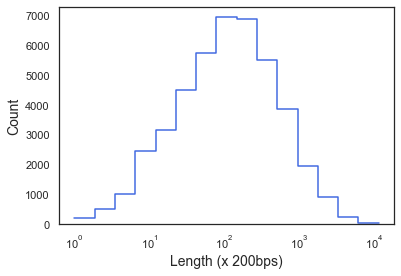

In [404]:
sns.histplot(g_e050_css_all_len,log_scale=True, element="step", fill=False, color="royalblue", bins=15)
print("Total count= {}".format(len(g_e050_css_all_len)))
plt.xlabel("Length (x 200bps)", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

In [ ]:
## next, complex gene for e050

In [405]:
e050_comp_gene_css_all,e050_less_comp_gene_css_all=extract_complex_css(css_E050_gene_unit_lst_all, thres="mean")

In [411]:
path_comp_e050="../database/temp_files/complexity/thres_mean/byCellType/E050/comp.pkl"

In [412]:
with open(path_comp_e050, "wb") as f:
    pickle.dump(e050_comp_gene_css_all,f)

In [413]:
path_less_e050="../database/temp_files/complexity/thres_mean/byCellType/E050/less_comp.pkl"

In [414]:
with open(path_less_e050, "wb") as g:
    pickle.dump(e050_less_comp_gene_css_all,g)

In [415]:
e050_comp_gene_css_all_len=[len(elm) for elm in e050_comp_gene_css_all]

Total count= 13298


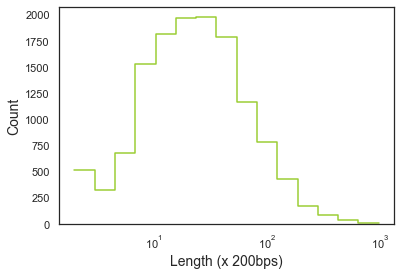

In [416]:
sns.histplot(e050_comp_gene_css_all_len,log_scale=True, element="step", fill=False, color="yellowgreen", bins=15)
print("Total count= {}".format(len(e050_comp_gene_css_all_len)))
plt.xlabel("Length (x 200bps)", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

In [69]:
path="../database/bed/gene_expression/"

In [200]:
g_hexp=pd.read_csv(path+"gene_highlyexpressed.refFlat", sep="\t", index_col=False, header=0)
# g_hexp.columns[0]="gene_id"
# g_hexp.index = g_hexp.iloc[:,0]
# g_hexp.index.rename("gene_id")

g_hexp=g_hexp.iloc[:,1:]
g_hexp.rename(columns={"name":"gene_id"}, inplace=True)
g_hexp.rename(columns={"#geneName":"geneName"}, inplace=True)
# g_exp.index = g_exp.iloc[:,0]

g_hexp.head()

,geneName,gene_id,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,gene type,transcript type,reference transcript name,reference transcript id
0,CD99,ENSG00000002586,chrX,+,2609219,2659350,2609401,2658845,10,"[2609219, 2632462, 2635645, 2637701, 2638396, ...","[2609468, 2632495, 2635693, 2637746, 2638465, ...",protein_coding,protein_coding,CD99-001,ENST00000381192
1,LASP1,ENSG00000002834,chr17,+,37026111,37078023,37026442,37075031,7,"[37026111, 37034338, 37046672, 37054664, 37070...","[37026511, 37034433, 37046757, 37054772, 37070...",protein_coding,protein_coding,LASP1-001,ENST00000318008
2,M6PR,ENSG00000003056,chr12,-,9092960,9102551,9094413,9099000,7,"[9092960, 9095011, 9096000, 9096396, 9098013, ...","[9094536, 9095138, 9096131, 9096506, 9098180, ...",protein_coding,protein_coding,M6PR-001,ENST00000000412
3,ARF5,ENSG00000004059,chr7,+,127228398,127231759,127228552,127231353,6,"[127228398, 127229136, 127229538, 127230119, 1...","[127228619, 127229217, 127229648, 127230191, 1...",protein_coding,protein_coding,ARF5-001,ENST00000000233
4,FKBP4,ENSG00000004478,chr12,+,2904118,2913124,2904305,2912424,10,"[2904118, 2906303, 2906894, 2907871, 2908253, ...","[2904410, 2906448, 2907037, 2907992, 2908410, ...",protein_coding,protein_coding,FKBP4-001,ENST00000001008


In [258]:
# function for preprocess the whole gene data and produce chromosome-wise gene lists
# each element is dataframe

def Gexp_Gene2GLChr(exp_gene_file='../database/bed/gene_expression/gene_highlyexpressed.refFlat'):
    print("Extracting the gene file ...")
    g_fn=exp_gene_file
    g_df_raw=pd.read_csv(g_fn, sep='\t', index_col=False, header=0)
    g_df=g_df_raw
    g_df=g_df.iloc[:,1:]
    g_df.rename(columns={"name":"gene_id"}, inplace=True)
    g_df.rename(columns={"#geneName":"geneName"}, inplace=True)
    g_df.rename(columns={"txStart":"TxStart"}, inplace=True) # to make it coherent to my previous codes
    g_df.rename(columns={"txEnd":"TxEnd"}, inplace=True)
#     g_df=g_df_raw.rename(columns={0:"geneName",1:"gene_id",2:"chrom",3:"strand",4:"txStart",5:"txEnd",
#                                       6:"cdsStart",7:"cdsEnd",8:"exonCount",9:"exonStart",10:"exonEnds",
#                                       11:"gene type",12:"transcript type",13:"reference transcript name",
#                                       14:"reference transcription id"})
    ## string to the list of "int", for exon start/end ##
    g_df_temp=g_df # copy for processing
    exon_start_int_lst=[]
    for i, str_lst in enumerate(g_df_temp["exonStarts"]):
        int_lst=[int(elm) for elm in str_lst.replace("[","").replace("]","").split(",")]
        assert g_df_temp["exonCount"][i]==len(int_lst) # make sure the no. element in exon start = count
        exon_start_int_lst.append(int_lst)    
    g_df_temp["exonStarts"]=exon_start_int_lst

    exon_end_int_lst=[]
    for i, str_lst in enumerate(g_df_temp["exonEnds"]):
        int_lst=[int(elm) for elm in str_lst.replace("[","").replace("]","").split(",")]
        assert g_df_temp["exonCount"][i]==len(int_lst) # make sure the no. element in exon start = count
        exon_end_int_lst.append(int_lst)    
    g_df_temp["exonEnds"]=exon_end_int_lst    
    g_df=g_df_temp # and make it back the original name
        
    g_df=g_df[["geneName","gene_id","chrom","TxStart","TxEnd"]] # extract these only
    
    # Remove other than regular chromosomes
    chr_lst=['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10',
             'chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19',
             'chr20','chr21','chr22','chrX','chrY']
    g_df=g_df.loc[g_df["chrom"].isin(chr_lst)]
    
    # Create a list of chromosome-wise dataframe 
    g_df_chr_lst=[]
    for num in range(len(chr_lst)):
        chr_num=chr_lst[num]
        g_chr_df='g_'+chr_num  # name it as "g_"
        locals()[g_chr_df]=g_df[g_df["chrom"]==chr_num]
        g_chr_df=locals()[g_chr_df]
        g_chr_df=g_chr_df.sort_values("TxStart")
        g_df_chr_lst.append(g_chr_df)
        
    # Remove the overlapped area (using removeOverlapDF function in css_utility.py)
    g_df_chr_collapsed_lst=[]
    for g_df_chr in g_df_chr_lst:
        g_df_chr_collapsed=removeOverlapDF(g_df_chr)
        assert len(g_df_chr)>=len(g_df_chr_collapsed)
        g_df_chr_collapsed_lst.append(g_df_chr_collapsed)
    print("Done!")
    
    return g_df_chr_collapsed_lst  # list of dataframe

In [259]:
# highly expressed case
g_df_chr_collapsed_lst=Gexp_Gene2GLChr(exp_gene_file='../database/bed/gene_expression/gene_highlyexpressed.refFlat')

Extracting the gene file ...
Done!


In [376]:
# just expressed case
gexp_df_chr_collapsed_lst=Gexp_Gene2GLChr(exp_gene_file='../database/bed/gene_expression/gene_expressed.refFlat')

Extracting the gene file ...
Done!


In [381]:
# just expressed case - convert to css 
css_exp_gene_lst_all=comp_expGene2css("../database/bed/gene_expression/gene_expressed.refFlat",df_e050)
css_exp_unit_lst_all=Convert2unitCSS_main(css_exp_gene_lst_all, unit=200)

Extracting the gene file ...
Done!
Matching to the chromatin state sequence data ...



Done!
Converting css from the raw length into unit-length ... 



Done!


In [382]:
g_exp_css_all=flatLst(css_exp_unit_lst_all)

In [383]:
len(g_exp_css_all)

13469

In [384]:
g_exp_css_all_len=[len(elm) for elm in g_exp_css_all]

Total count= 13469


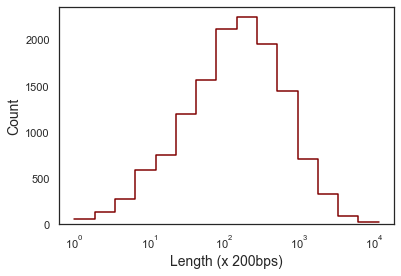

In [389]:
sns.histplot(g_exp_css_all_len,log_scale=True, element="step", fill=False, color="maroon", bins=15)
print("Total count= {}".format(len(g_exp_css_all_len)))
plt.xlabel("Length (x 200bps)", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

### So now we have bed files for highly expressed.. then we need CSS for E050 

In [260]:
df_e050=bed2df_expanded("../database/bed/unzipped/E050_15_coreMarks_stateno.bed")
df_e050.head()

,chromosome,start,end,state,length,unit,state_seq,state_seq_full
0,chr1,0,9800,15,9800,49,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
1,chr1,9800,10600,9,800,4,I,IIII
2,chr1,10600,13200,15,2600,13,O,OOOOOOOOOOOOO
3,chr1,13200,13400,7,200,1,G,G
4,chr1,13400,28400,5,15000,75,E,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...


In [395]:
df_e050.tail()

,chromosome,start,end,state,length,unit,state_seq,state_seq_full
485249,chrY,58972000,58997400,8,25400,127,H,HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...
485250,chrY,58997400,59001600,9,4200,21,I,IIIIIIIIIIIIIIIIIIIII
485251,chrY,59001600,59002200,8,600,3,H,HHH
485252,chrY,59002200,59033400,9,31200,156,I,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...
485253,chrY,59033400,59373400,15,340000,1700,O,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...


In [394]:
len(df_e050)

485254

In [262]:
all_unit_css=df2unitcss(df_e050)

In [265]:
len(all_unit_css[0]) # unit length

1246253

In [266]:
css_lst_chr=df2longcss(df_e050)

In [268]:
len(css_lst_chr[0]) # original 

249250600

In [289]:
def comp_expGene2css(exp_gene_file,df):   # df indicates css, created by bed2df_expanded
    """
    modified from `compGene2css`
    Input: Reference gene file, df (CSS)
    Output: list of chromosome-wise list that contains the css at genic area only.
    """
    g_lst_chr=Gexp_Gene2GLChr(exp_gene_file)
#     g_lst_chr=whGene2GLChr(whole_gene_file) # list of gene table df per chromosome
    css_lst_chr=df2longcss(df) # list of long css per chromosome
    total_chr=len(g_lst_chr)
    
    print("Matching to the chromatin state sequence data ...")
    css_gene_lst_all=[]
    for i in tqdm_notebook(range(total_chr)):
        css=css_lst_chr[i]   # long css of i-th chromosome
        gene_df=g_lst_chr[i] # gene df of i-th chromosome
        
        css_gene_lst_chr=[]
        for j in range(len(gene_df)):
            g_start=gene_df["TxStart"].iloc[j]-1  # python counts form 0
            g_end=gene_df["TxEnd"].iloc[j]+1      # python excludes the end
            
            css_gene=css[g_start:g_end]           # cut the gene area only
            css_gene_lst_chr.append(css_gene)     # store in the list
          
        css_gene_lst_all.append(css_gene_lst_chr)  # list of list
    
    assert len(css_gene_lst_all)==total_chr
    
    # remove chromosome if it is empty (e.g. chrY for female)
    css_gene_lst_all=[elm for elm in css_gene_lst_all if elm!=[]] 
            
    print("Done!")
    return css_gene_lst_all ## this is the original length! reduce it at Convert2unitCSS_main(css_lst_all, unit=200)!

In [290]:
css_gene_lst_all=comp_expGene2css("../database/bed/gene_expression/gene_highlyexpressed.refFlat",df_e050)

Extracting the gene file ...
Done!
Matching to the chromatin state sequence data ...



Done!


In [291]:
css_unit_lst_all=Convert2unitCSS_main(css_gene_lst_all, unit=200)

Converting css from the raw length into unit-length ... 



Done!


In [296]:
len(css_unit_lst_all[0])

121

In [293]:
g_hexp_css_all=flatLst(css_unit_lst_all)

In [380]:
len(g_hexp_css_all)

1051

In [298]:
g_hexp_css_all[-1]

'AABBBGEEEEEEEEEEEEEEEEEEEEEEEEEEEEGGGGGGGGGGGGGGGGEEEEEEEEEEEEEEEEEEEEEDDDEEEEEEEEEEDDDDDDDDDDDDDDDEEEEEEEEEEEEEEEEEEEEEEEEEDDDDDEEEEEEDDDDDDDDDDDDDHHHHHHHEEEEEEEEEEEHHHHHHHEEEEEEEEEDDDDDDDDDDDDDDDDDDDDDDDDDEEEEEEEEEEEDDDDDDDDDDDDDHHHHHHHHHHHHHHHII'

In [299]:
g_hexp_css_len=[len(elm) for elm in g_hexp_css_all]

In [333]:
len(g_hexp_css_len)

1051

Total count= 1051


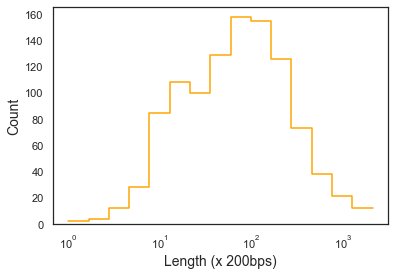

In [373]:
sns.set(rc={"font.size":15, "font.family":"serif"})
sns.set_style("white")
print("Total count= {}".format(len(g_hexp_css_len)))
p=sns.histplot(g_hexp_css_len, log_scale=True, element="step", fill=False, color="orange", bins=15)
plt.xlabel("Length (x 200bps)", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()
# p.set_xticks(p.get_xticks())
# p.set_xticklabels(p.get_xticks(), fontfamily="serif", fontsize=12)

#### Is this length normal..? looks like too short. Let me compare it with complexity case

In [361]:
with open("../database/temp_files/complexity/thres_mean/comp","rb") as f:
    comp_lst=pickle.load(f)

In [364]:
len(comp_lst)

37

In [365]:
comp_css_len=[len(elm) for elm in comp_lst]

Total count= 13484


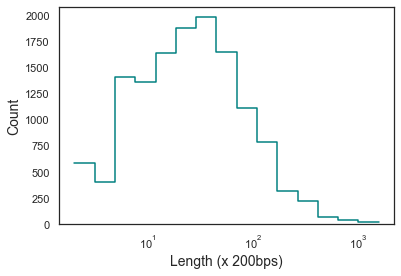

In [375]:
sns.histplot(comp_css_len,log_scale=True,element="step", fill=False, color="teal", bins=15)
print("Total count= {}".format(len(comp_css_len)))
plt.xlabel("Length (x 200bps)", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

#### Convert string to int: exonStarts and exonEnds

In [124]:
exon_start_test=[int(elm) for elm in g_hexp["exonStarts"][0].replace("[","").replace("]","").split(",")]

In [125]:
exon_end_test=[int(elm) for elm in g_hexp["exonEnds"][0].replace("[","").replace("]","").split(",")]

#### Exon is short

In [128]:
np.array(exon_end_test)-np.array(exon_start_test)

array([249,  33,  48,  45,  69,  48,  51, 114,  57, 531])

#### Tx is long

33205.17153284672


<AxesSubplot:ylabel='Count'>

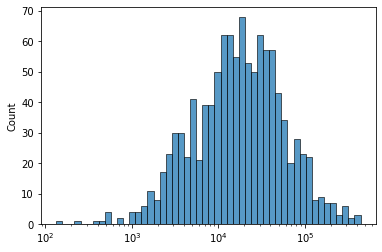

In [136]:
print(np.mean(g_hexp["txEnd"]-g_hexp["txStart"]))
sns.histplot(g_hexp["txEnd"]-g_hexp["txStart"], bins=50, log_scale=True)

In [90]:
g_hexp.sort_values("chrom", inplace=True)
g_hexp.head(20)

,geneName,gene_id,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,gene type,transcript type,reference transcript name,reference transcript id
674,TCTEX1D1,ENSG00000152760,chr1,+,67218142,67244470,67220341,67243137,5,"[67218142, 67220338, 67236069, 67241961, 67242...","[67218267, 67220460, 67236161, 67242086, 67244...",protein_coding,protein_coding,TCTEX1D1-001,ENST00000282670
5,KDM1A,ENSG00000004487,chr1,+,23345940,23410182,23346089,23409857,19,"[23345940, 23356961, 23376879, 23380253, 23381...","[23346440, 23357127, 23377013, 23380332, 23381...",protein_coding,protein_coding,KDM1A-001,ENST00000356634
1092,DCAF8,ENSG00000258465,chr1,-,160187253,160254920,160187381,160251981,18,"[160187253, 160188113, 160188638, 160192440, 1...","[160187498, 160188230, 160188758, 160192571, 1...",protein_coding,protein_coding,DCAF8-001,ENST00000556710
798,IRF2BP2,ENSG00000168264,chr1,-,234740014,234745271,234742882,234745240,2,"[234740014, 234744240]","[234743598, 234745271]",protein_coding,protein_coding,IRF2BP2-001,ENST00000366610
980,CDC42SE1,ENSG00000197622,chr1,-,151023446,151042801,151026722,151028206,8,"[151023446, 151026706, 151027491, 151028152, 1...","[151025803, 151026797, 151027602, 151028469, 1...",protein_coding,protein_coding,CDC42SE1-001,ENST00000439374
855,UQCRH,ENSG00000173660,chr1,+,46769302,46782448,46769438,46782256,4,"[46769302, 46774772, 46775826, 46782223]","[46769492, 46774799, 46775988, 46782448]",protein_coding,protein_coding,UQCRH-001,ENST00000311672
493,ZRANB2,ENSG00000132485,chr1,-,71528973,71546980,71530756,71546678,10,"[71528973, 71532458, 71534958, 71536509, 71537...","[71530820, 71532617, 71535045, 71536679, 71537...",protein_coding,protein_coding,ZRANB2-001,ENST00000370920
857,TOMM20,ENSG00000173726,chr1,-,235272650,235292251,235275378,235292030,5,"[235272650, 235277082, 235283132, 235285640, 2...","[235275423, 235277225, 235283214, 235285687, 2...",protein_coding,protein_coding,TOMM20-001,ENST00000366607
982,S100A10,ENSG00000197747,chr1,-,151955390,151966866,151955638,151958706,3,"[151955390, 151958574, 151966227]","[151955800, 151958727, 151966866]",protein_coding,protein_coding,S100A10-001,ENST00000368811
16,CSDE1,ENSG00000009307,chr1,-,115259533,115300604,115260789,115282511,19,"[115259533, 115261233, 115262199, 115263159, 1...","[115260837, 115261366, 115262363, 115263338, 1...",protein_coding,protein_coding,CSDE1-001,ENST00000339438


In [94]:
g_hexp["chrom"].unique()

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21',
       'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9',
       'chrX'], dtype=object)

In [13]:
epi57_raw=pd.read_csv(path+"57epigenomes.RPKM.pc.tsv", sep="\t",index_col=False, header=0)

In [15]:
epi57_raw.head()

,gene_id,E000,E003,E004,E005,E006,E007,E011,E012,E013,...,E114,E116,E117,E118,E119,E120,E122,E123,E127,E128
0,ENSG00000000003,23.265,43.985,37.413,29.459,21.864,55.649,52.940,71.629,61.292,...,37.989,0.038,42.639,49.983,11.554,11.847,43.723,0.267,13.758,15.818
1,ENSG00000000005,0.872,1.642,6.498,0.000,0.157,0.003,0.115,0.087,0.055,...,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.006,0.000,0.000
2,ENSG00000000419,55.208,35.259,58.308,48.208,37.477,45.923,44.959,40.438,41.970,...,52.215,79.197,107.098,62.811,42.386,54.869,16.652,73.719,56.578,56.371
3,ENSG00000000457,3.237,2.596,2.345,8.775,2.723,3.700,3.912,5.011,4.158,...,4.829,11.082,8.814,2.646,2.483,2.527,2.549,7.651,4.967,3.714
4,ENSG00000000460,7.299,6.649,7.838,7.324,0.830,5.354,5.940,5.704,6.213,...,8.001,13.743,25.369,3.373,4.646,2.179,4.099,22.103,3.290,2.491


In [14]:
epi57=epi57_raw

In [6]:
epi57.head()

,gene_id,E000,E003,E004,E005,E006,E007,E011,E012,E013,...,E114,E116,E117,E118,E119,E120,E122,E123,E127,E128
0,ENSG00000000003,23.265,43.985,37.413,29.459,21.864,55.649,52.940,71.629,61.292,...,37.989,0.038,42.639,49.983,11.554,11.847,43.723,0.267,13.758,15.818
1,ENSG00000000005,0.872,1.642,6.498,0.000,0.157,0.003,0.115,0.087,0.055,...,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.006,0.000,0.000
2,ENSG00000000419,55.208,35.259,58.308,48.208,37.477,45.923,44.959,40.438,41.970,...,52.215,79.197,107.098,62.811,42.386,54.869,16.652,73.719,56.578,56.371
3,ENSG00000000457,3.237,2.596,2.345,8.775,2.723,3.700,3.912,5.011,4.158,...,4.829,11.082,8.814,2.646,2.483,2.527,2.549,7.651,4.967,3.714
4,ENSG00000000460,7.299,6.649,7.838,7.324,0.830,5.354,5.940,5.704,6.213,...,8.001,13.743,25.369,3.373,4.646,2.179,4.099,22.103,3.290,2.491


In [8]:
epi57.index = epi57.iloc[:,0]

In [10]:
epi57.head()

,gene_id,E000,E003,E004,E005,E006,E007,E011,E012,E013,...,E114,E116,E117,E118,E119,E120,E122,E123,E127,E128
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,ENSG00000000003,23.265,43.985,37.413,29.459,21.864,55.649,52.940,71.629,61.292,...,37.989,0.038,42.639,49.983,11.554,11.847,43.723,0.267,13.758,15.818
ENSG00000000005,ENSG00000000005,0.872,1.642,6.498,0.000,0.157,0.003,0.115,0.087,0.055,...,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.006,0.000,0.000
ENSG00000000419,ENSG00000000419,55.208,35.259,58.308,48.208,37.477,45.923,44.959,40.438,41.970,...,52.215,79.197,107.098,62.811,42.386,54.869,16.652,73.719,56.578,56.371
ENSG00000000457,ENSG00000000457,3.237,2.596,2.345,8.775,2.723,3.700,3.912,5.011,4.158,...,4.829,11.082,8.814,2.646,2.483,2.527,2.549,7.651,4.967,3.714
ENSG00000000460,ENSG00000000460,7.299,6.649,7.838,7.324,0.830,5.354,5.940,5.704,6.213,...,8.001,13.743,25.369,3.373,4.646,2.179,4.099,22.103,3.290,2.491


In [11]:
epi57=epi57.iloc[:,1:]

In [12]:
epi57.head()

,E000,E003,E004,E005,E006,E007,E011,E012,E013,E016,...,E114,E116,E117,E118,E119,E120,E122,E123,E127,E128
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,23.265,43.985,37.413,29.459,21.864,55.649,52.940,71.629,61.292,44.280,...,37.989,0.038,42.639,49.983,11.554,11.847,43.723,0.267,13.758,15.818
ENSG00000000005,0.872,1.642,6.498,0.000,0.157,0.003,0.115,0.087,0.055,1.577,...,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.006,0.000,0.000
ENSG00000000419,55.208,35.259,58.308,48.208,37.477,45.923,44.959,40.438,41.970,51.515,...,52.215,79.197,107.098,62.811,42.386,54.869,16.652,73.719,56.578,56.371
ENSG00000000457,3.237,2.596,2.345,8.775,2.723,3.700,3.912,5.011,4.158,3.292,...,4.829,11.082,8.814,2.646,2.483,2.527,2.549,7.651,4.967,3.714
ENSG00000000460,7.299,6.649,7.838,7.324,0.830,5.354,5.940,5.704,6.213,7.551,...,8.001,13.743,25.369,3.373,4.646,2.179,4.099,22.103,3.290,2.491


In [18]:
len(epi57)

19795

In [17]:
epi57.describe()

,E000,E003,E004,E005,E006,E007,E011,E012,E013,E016,...,E114,E116,E117,E118,E119,E120,E122,E123,E127,E128
count,19795.000000,19795.000000,19795.000000,19795.000000,19795.000000,19795.000000,19795.00000,19795.000000,19795.000000,19795.000000,...,19795.000000,19795.000000,19795.000000,19795.000000,19795.000000,19795.000000,19795.000000,19795.000000,19795.000000,19795.000000
mean,15.616650,15.669690,16.786629,16.176443,16.627451,15.957653,14.25646,13.512338,14.372464,15.280072,...,15.369580,15.892908,14.933831,19.967192,20.046715,16.127057,18.468016,17.351987,19.204572,15.389853
std,59.060454,54.568895,72.916420,89.982958,96.150932,64.905445,49.29719,40.523499,51.430895,50.108760,...,70.770097,77.359634,49.595660,182.542526,165.263021,86.224347,97.655144,111.013555,173.338817,76.854728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.357500,0.118000,0.086000,0.064000,0.013000,0.064000,0.13900,0.110000,0.135000,0.139000,...,0.032000,0.013000,0.005000,0.012000,0.014000,0.023000,0.012000,0.007000,0.019000,0.014000
50%,4.682000,3.329000,2.653000,2.763000,2.360000,3.573000,4.14500,3.895000,3.729000,3.514000,...,2.602000,1.746000,1.826000,2.408000,2.395000,2.248000,2.198000,1.606000,2.476000,2.147000
75%,15.003500,13.404000,13.385000,12.443500,11.961000,14.279500,14.20450,14.176000,13.311500,13.955000,...,12.969500,13.590500,13.476500,12.422000,12.181500,11.598000,12.166000,13.679500,12.305500,11.519500
max,3445.470000,2211.915000,4517.905000,8590.590000,9123.360000,4063.105000,2688.12000,1574.320000,2935.310000,1894.330000,...,4234.410000,5694.820000,1947.970000,16876.500000,13407.500000,4733.430000,5324.800000,11266.800000,16325.100000,4003.370000


In [47]:
epi57["gene_id"]

0        ENSG00000000003
1        ENSG00000000005
2        ENSG00000000419
3        ENSG00000000457
4        ENSG00000000460
              ...       
19790    ENSG00000259718
19791    ENSG00000259741
19792    ENSG00000259752
19793    ENSG00000259765
19794    ENSG00000259766
Name: gene_id, Length: 19795, dtype: object